## Package installation

In [1]:
%%capture
!conda install --yes -c bioconda viennarna wand

# Overview and references
You will develop a routine in Python to take an input nucleic acid sequence, run RNAfold to
obtain a secondary structure and obtain a graphical representation of the folded RNA. Using
your routine, you will fold some RNAs pulled from a recent publication and compare your
structures to those provided.

You are expected to keep a thorough record of everything you did in your notebook. Plot any results in-line and explain them.

### RNAfold
https://www.tbi.univie.ac.at/RNA/RNAfold.1.html

### Python subprocess module
https://docs.python.org/3/library/subprocess.html

### Penchovsky and Breaker paper
[“Computational design and experimental validation of oligonucleotide-sensing allosteric
ribozymes”](https://www.nature.com/articles/nbt1155)
(PDF has also been uploaded to the repository).

[Associated content (summary)](https://www.nature.com/articles/nbt1105-1374)


### Wand Image Tool
https://docs.wand-py.org/

## Background
Your PI recently sent an interesting paper to the group’s listserv by Penchovsky and Breaker.
They want to start using some of the riboswitches in the paper to control gene expression in E.
coli. You’ve been asked to pull the sequences out of the paper and conduct a first-pass analysis
of them using RNAfold from the ViennaRNA package. Specifically, your PI wants to know if the
sequences do, in fact, fold the way the authors say they do.

*Don’t worry if you can’t make too much sense of the publication, but do try to give it a quick
read before getting started.*

## Let’s try to understand what these things do
The paper provides a number of riboswitch sequences that adopt different conformations when
one or more oligonucleotide binding sites (OBS) are bound. These different conformations have
different functions, allowing the riboswitches to take input (i.e., whether or not OBS are bound)
and turn that into an output (i.e., a different conformation and therefore different function).

Why are these riboswitches called AND-1 and OR-1? Well, the riboswitches in this paper are
attempts at implementing binary logic gates. The authors define the input to the logic gates as
the presence (i.e., TRUE) or absence (i.e., FALSE) of a DNA oligonucleotide with a particular
sequence. They define the output of the logic gates as whether the riboswitches themselves
undergo self-cleavage (i.e., TRUE) or not (i.e., FALSE). The riboswitches undergo self-cleavage
only when the correct oligonucleotides are bound to their target sites.

In the paper, the blue regions of the riboswitches represent the OBS. When they are bound,
consider that site to be receiving a TRUE input. The absence of OBS binding is a FALSE input.
The red regions of the riboswitches are the sites responsible for self-cleavage. When the two
red regions are aligned and bound to each other, consider that to be a TRUE output. When the
red regions are not exactly bound, consider that to be a FALSE output.

## Part 1.1
Will the AND-1 riboswitch cleave itself when both of its OBS are bound?
Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?
What behavior do we expect from the YES-1 riboswitch?

### Part 1.1 Answer

The AND-1 riboswitch will cleave itself when both of its OBS site are bound, matching the functionality of an and boolean logic gate. This is the only configuration in which the red regions are bound to each other, putting it into the self-cleaving hammerhead structure.

The OR-1 riboswitch will not cleave itself when neither of its OBS site are bound, matching the functionality of an or boolean logic gate. In this configuration the red regions are not bound to each other, keeping it out of the self-cleaving hammerhead structure.

The YES-1 riboswitch is simpler and only has one OBS site. If this site is bound, the riboswitch will form the self-cleaving structure. If the site is not bound, it will not self-cleave.

## Sequences from the paper

Have a look at the publication, and focus on the figures for each RNA logic gate sequences. We
will pull those sequences and analyze them. It’s generally expected that any
sequences used will be uploaded somewhere, but occasionally (like in this case) they are not.
For your convenience, we have copied the relevant sequences for this lab:

In [2]:
yes1 = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
not1 = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"
and1 = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"
or1 = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"

## Part 1.2
For each riboswitch, produce a markdown table in your iPython notebook that contains the
following information: (1) riboswitch name, (2) start and end coordinates of OBS-1 (blue
region), (3) start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-
1), and (4) start and end coordinates of the two red regions.

### Part 1.2 Answer

Note: All coordinates in format start-end and are one-indexed. Information taken from images in the Penchovsky and Breaker paper.

| Riboswitch Name | Coords. of OBS-1 | Coords. of OBS-2 | Coords. of Red Regions
| --- | --- | --- | --- |
| YES-1 | 26-47 | N/A | 16-21; 49-54 |
| NOT-1 | 44-66 | N/A | 40-43; 74-77 |
| AND-1 | 30-45 | 49-64 | 16-23; 70-77 |
| OR-1 | 27-46 | 47-66 | 16-26; 67-77 |

## Part 2 : Now, write a function to fold RNA and view the output

Have a look at the example in the lecture slides and use it to complete the function below that runs the
`RNAfold` command from within Python. As a sanity check, you can check if you can run in a terminal first (or here as well using `!` before the bash command).

If it doesn’t run in a terminal, it won’t run in Python! Don’t forget to add some newlines at the end
of your input, and an @ symbol to tell `RNAfold` you’re finished. 

The function `seq_to_fold` should return an image (Wand Image) object. You'll notice from your initial `RNAFold` runs that a file called `'rna.ps'` is generated. This can be visualized like so:

```python
img = WImage(filename = 'rna.ps')
```

In [3]:
import subprocess
from typing import List
from wand.image import Image as WImage

def seq_to_fold(seq: str) -> WImage:
    """
    Fold an RNA sequence.
        
    Parameters
    ----------
    seq: str
        RNA sequence
    
    Returns
    -------
    WImage illustrating the predicted RNA fold.
    """
    # implement me right here!
    appended_chars = "\n\n@"
    p = subprocess.run(['RNAfold'], input=bytes(seq+appended_chars, 'ascii'))
    img = WImage(filename = 'rna.ps')
    return img

## Part 3
Start by generating one plot per riboswitch (YES-1, NOT-1, AND-1, and OR-1) with default
parameters. Compare each plot to the native conformation given in the publication. Are they
the same? Are they different? Are there any stem-loop structures that don’t match up? What
might explain the differences? See if you can track down the parameters the authors used and
compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).

*There is no need to compare every last base position to the paper, but do give us a general idea
about the presence of stem-loops and whether the red regions have bound each other.*

### Overview of Results

*Charts shown below, analysis summarized in this section*

**YES-1**: This structure has many differences from the YES-1 structure in the publication. This structure has 6 loops vs. 5 in the publication. Additionally the central multi-loop in this structure has 4 branches vs. 3 in the publication.

**NOT-1**: This structure matches the structure in the paper. Notably, the red regions are bound to each other.

**AND-1**: This structure matches the structure in the paper. This is based on size and contents of the loops. The red regions are not bound.

**OR-1**: This structure matches the structure in the paper. This is based on size and contents of the loops. The red regions are not bound.

Most of the predicted structures match the structures proposed in the paper, with the exception of the YES-1 riboswitch. The paper uses RNAfold's default temperature of 37C, but there are many other parameters that may have been changed to cause this difference (e.g. treatment of 'lonely pairs', treatment of 'dangling ends').

### YES-1 riboswitch

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)


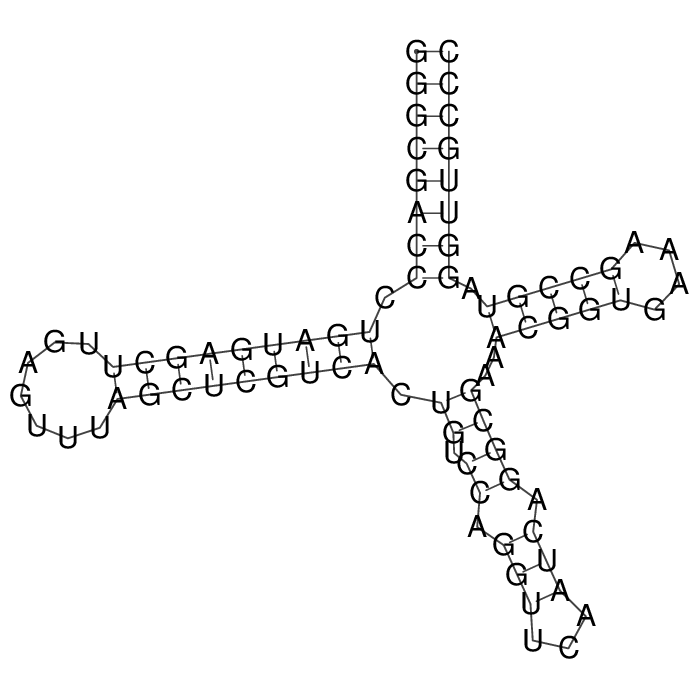

In [4]:
seq_to_fold(yes1)

### NOT-1 riboswitch

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)


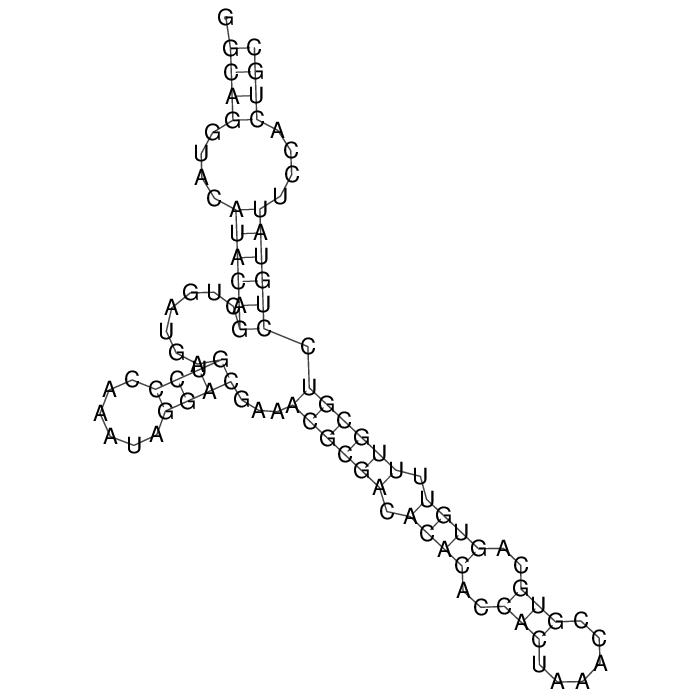

In [5]:
seq_to_fold(not1)

### AND-1 riboswitch

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)


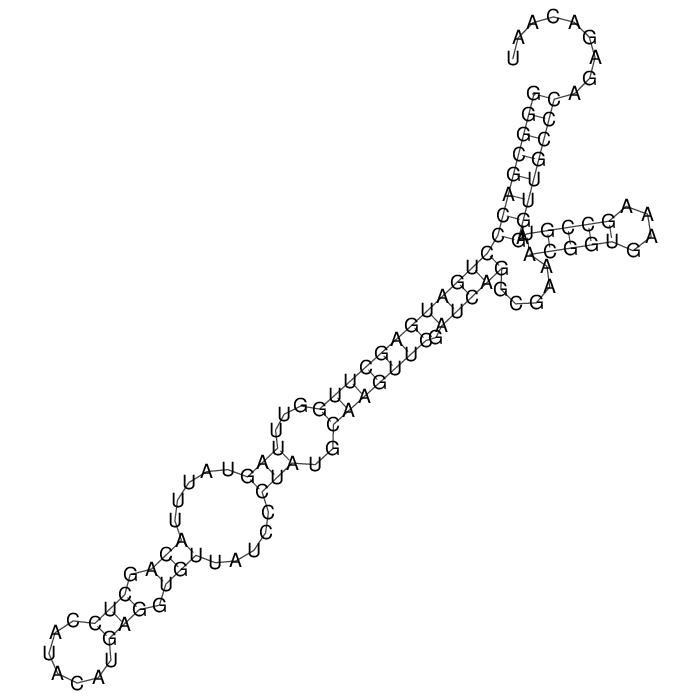

In [6]:
seq_to_fold(and1)

### OR-1 riboswitch

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)


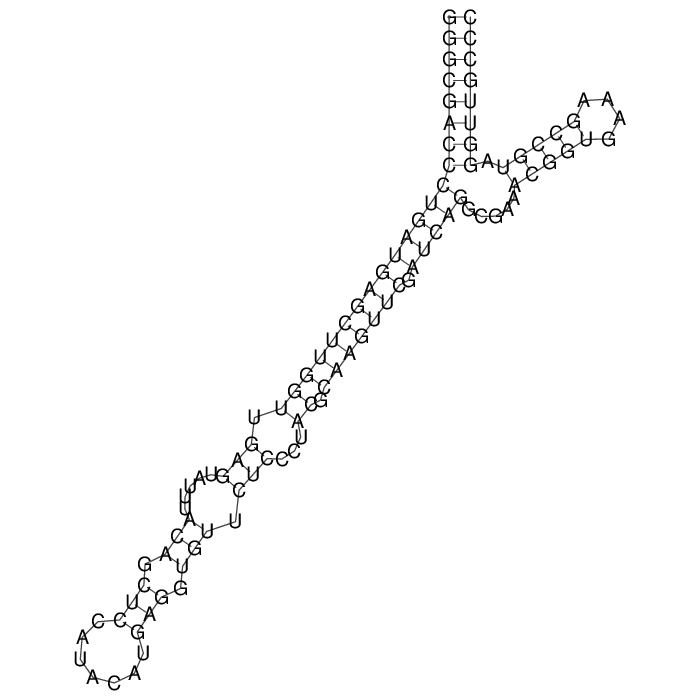

In [7]:
seq_to_fold(or1)

## Part 4
Next, simulate OBS binding in YES-1 and NOT-1. The idea here is that we’d like to see what
conformation these riboswitches adopt when their target OBS is bound. To simulate OBS binding, we tell RNAfold to prevent the blue OBS region (that we noted down in our table
above) from pairing to any other region of the riboswitch. To do this, we pass the –C parameter
to RNAfold using a file **which you will have to generate inside your function**.
```bash
RNAfold -C YES-1_contraints.txt
```
The YES-1_contraints.txt file should contain one letter for each base in YES-1. Use a dot (“.”) for
every unconstrained base, and a lower-case x for every base that you want to prevent from
pairing. That is to say, put an x at every base spanning the blue OBS region.

1. Implement `seq_to_fold_with_constraints` that closely follows the original implementation but creates a constraints file on the fly and uses it with the `-C` option.
2. Now, fold YES-1 again with constraints and see what you get. Does it look like the self-cleaving
   form of YES-1 in Figure 2? Are the red regions bound to each other? Do the same for NOT-1.

In [8]:
import subprocess
from typing import List, Tuple
from wand.image import Image as WImage

def seq_to_fold_with_constraints(seq: str, constraints: List[Tuple[int, int]]) -> WImage:
    """
    Fold an RNA sequence with constraints.
        
    Parameters
    ----------
    seq: str
        RNA sequence
    constraints: List[Tuple[int, int]]
        List of regions to be masked. Each region is defined using start and end coordinates.
        For example, `[(10, 15), (20, 22)]` means positions 10-15 and 20-22 should be masked.
    
    Returns
    -------
    WImage illustrating the predicted RNA fold.
    """
    
    ##Generate constraints file
    constraints_chars = ["." for i in range(len(seq))]
    for pair in constraints:
        #converting to zero-indexing, inclusive of final character
        start = pair[0] - 1 
        end = pair[1]
        for i in range(start, end):
            constraints_chars[i] = 'x'
    constraints_chars_str = "".join(constraints_chars)
    file = open("seq_with_constraints.txt","w")
    file.write(seq+'\n')
    file.write(constraints_chars_str)
    file.close()
    
    p = subprocess.run(['RNAfold', "-C", "seq_with_constraints.txt"])
    img = WImage(filename = 'rna.ps')
    return img

### Overview of Results

*Charts shown below, analysis summarized in this section*

**YES-1**: This structure matches the self-cleaving structure in the paper, with the red regions bound to each other as predicted.

**NOT-1**: This structure matches the non-cleaving structure in the paper, with the red regions separate from each other as predicted.

### YES-1 riboswitch

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)


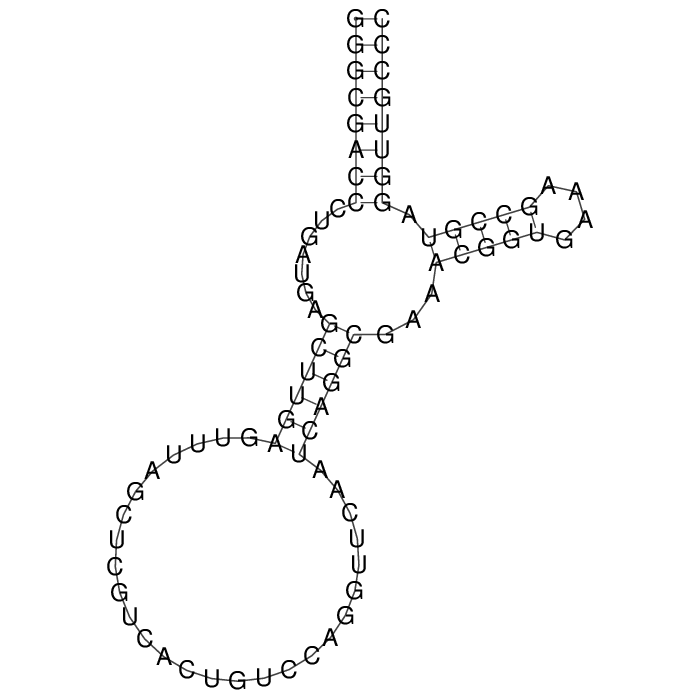

In [9]:
seq_to_fold_with_constraints(yes1,[(26,47)])

### NOT-1 riboswitch

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-20.80)


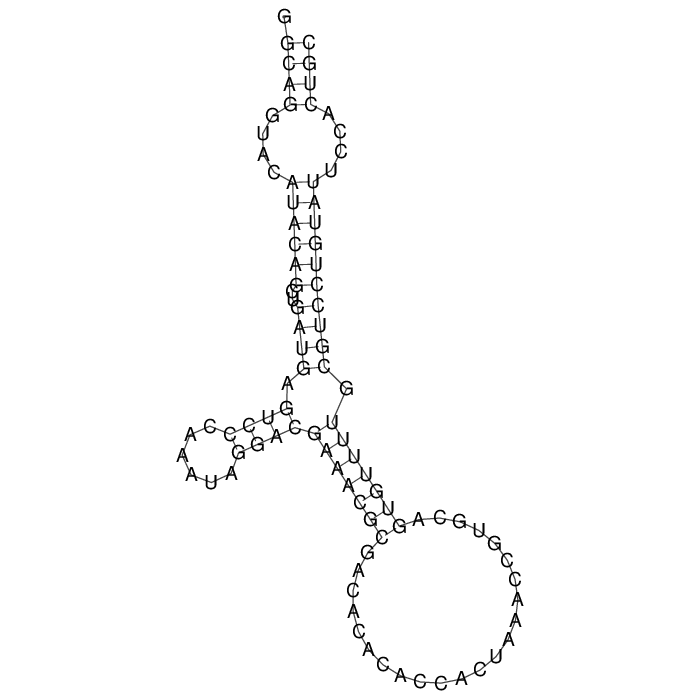

In [10]:
seq_to_fold_with_constraints(not1,[(44,66)])

## Part 5
Simulating OBS binding for AND-1 and OR-1 is more complicated. Recall that AND and OR
logic gates have two inputs, and so their truth tables have four rows: F/F, T/F, F/T, and T/T. In
Part 3 we simulated the F/F case, and so now must simulate the other three. This will require
you to produce three constraint files for AND-1, and three for OR-1. One file will have OBS-1 x’d
out, another will have OBS-2 x’d out, and the third will have both OBS-1 and OBS-2 x’d out.

Produce the constraint files, run RNAfold, and compare the output files to the paper.
Determine whether the red regions (which you noted in your table above) pair with each other
for each of the four possible input combinations. Generate a truth table for the AND-1 and the
OR-1 riboswitches based on your results.

**According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims?**

### Overview of Results

*Truth tables and charts shown below, analysis summarized in this section*

**AND-1**: The resulting structure is similar to the paper for the T/F and F/T cases, with similar loop structures and unbound red regions. Critically, however, the structures are different for the T/T case, with the red regions remaining unbound. Our resulting boolean table will not match a boolean and-gate.

**OR-1**: The resulting structure is similar to the paper for the T/T and F/T cases, with red regions bound to each other. Once again however, there is a mismatch that will result in a boolean table that doesn't match or-logic. In the T/F case the red regions are not bound to each other as they should be.

As mentioned, there could be a number of algorithmic difference that led to my predicted results being different than the paper's, but strictly based on my results they do not appear to work as claimed.

### AND-1 riboswitch

#### Truth Table Results

| OBS-1 | OBS-2 | Paper Result (And Gate) | My Result | Match?
| --- | --- | --- | --- | --- |
| T | T | T | F | **No** |
| T | F | F | F | Yes |
| F | T | F | F | Yes |
| F | F | F | F | Yes |

#### T/T

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)


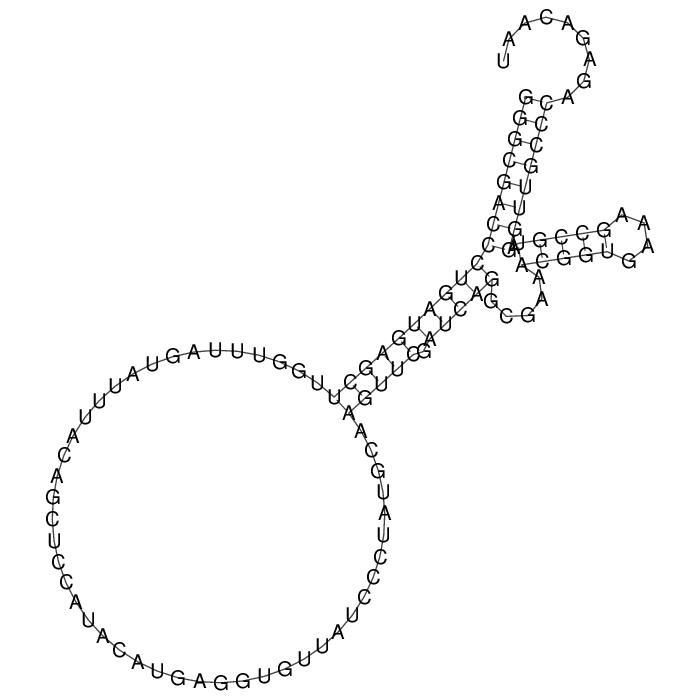

In [11]:
seq_to_fold_with_constraints(and1,[(30,45), (49,64)])

#### T/F

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)


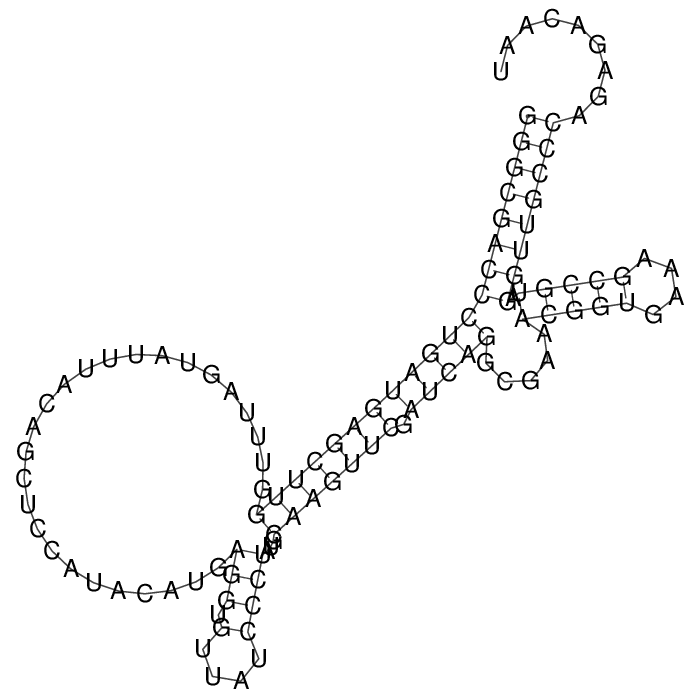

In [12]:
seq_to_fold_with_constraints(and1,[(30,45)])

#### F/T

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)


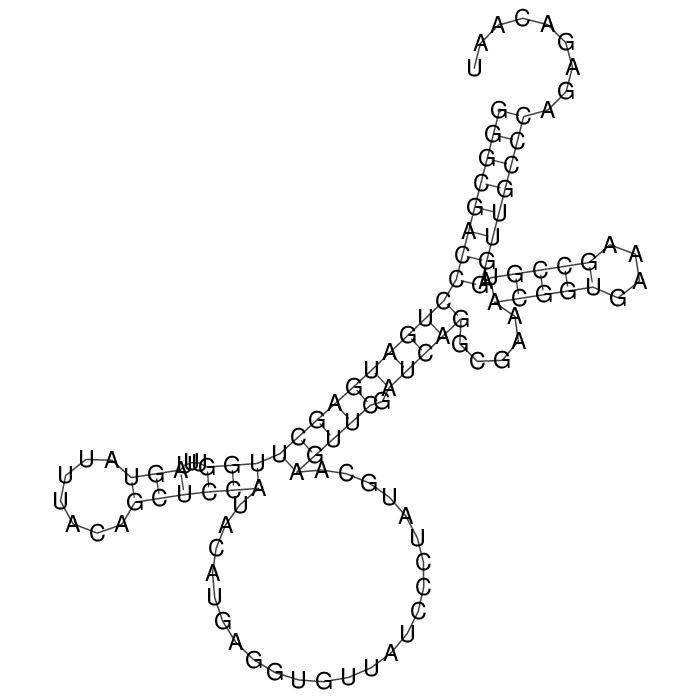

In [13]:
seq_to_fold_with_constraints(and1,[(49,64)])

### OR-1 riboswitch

#### Truth Table Results

| OBS-1 | OBS-2 | Paper Result (Or Gate) | My Result | Match?
| --- | --- | --- | --- | --- |
| T | T | T | T | Yes |
| T | F | T | F | **No** |
| F | T | T | T | Yes |
| F | F | F | F | Yes |

#### T/T

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)


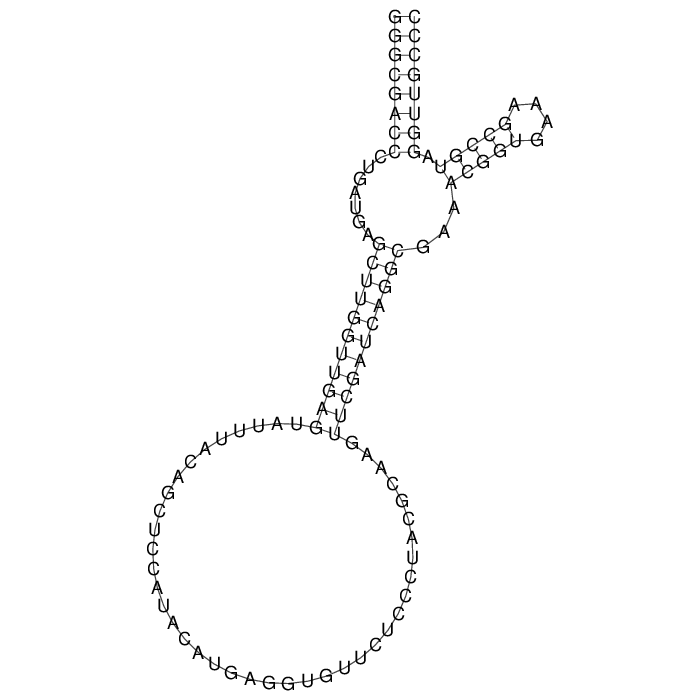

In [14]:
seq_to_fold_with_constraints(or1,[(27,46), (47,66)])

#### T/F

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)


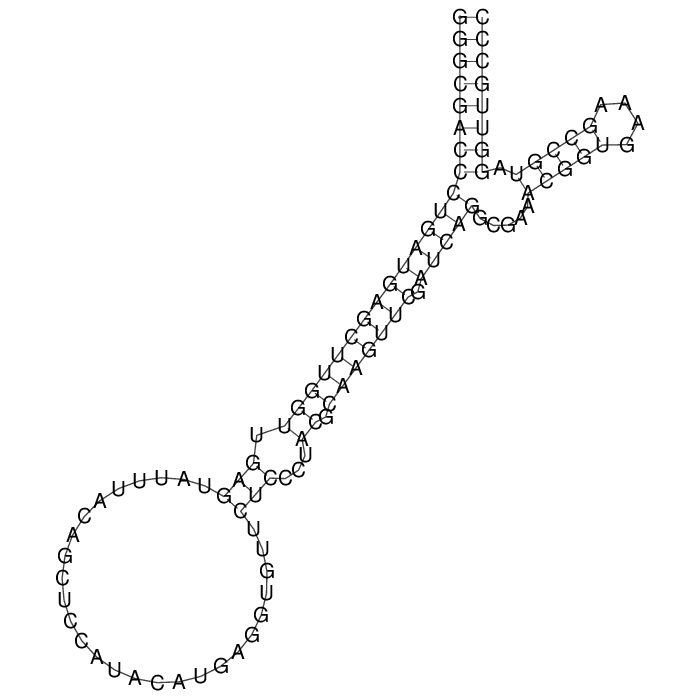

In [15]:
seq_to_fold_with_constraints(or1,[(27,46)])

#### F/T

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)


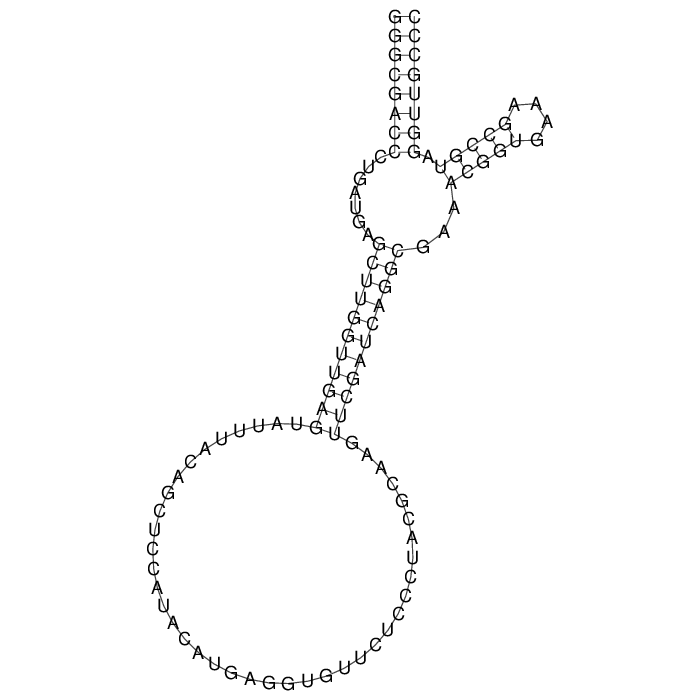

In [16]:
seq_to_fold_with_constraints(or1,[(47,66)])